In [1]:
# Import the necessary libraries

import re 

import numpy as np

import tweepy 

from tweepy import OAuthHandler 

from textblob import TextBlob 

import matplotlib.pyplot as plt

import pandas as pd

from wordcloud import WordCloud

from better_profanity import profanity

In [2]:
# Remember to keep your Keys and Tokens a secret!

#consumer_key = 'xxxxx'
#consumer_secret = 'xxxxx' 
#access_token = 'xxxxx'
#access_token_secret = 'xxxxx'


In [3]:
# Access Twitter Data

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)


api = tweepy.API(auth)

In [4]:
# Input a query from the user

query = input("Please enter your topic / person of interest: ")

# In this case, we will input the query as 'Elon Musk'

# Filter the query to remove retweets

filtered = query + "-filter:retweets"

# Generate the latest tweets on the given query 

tweets = tweepy.Cursor(api.search_tweets, 
                           q=filtered,
                           lang="en").items(100)

# Create a list of the tweets, the users, and their location

list1 = [[tweet.text, tweet.user.screen_name, tweet.user.location] for tweet in tweets]

Please enter your topic / person of interest: elon musk


In [5]:
# Convert the list into a dataframe

df = pd.DataFrame(data=list1, 
                    columns=['tweets','user', "location"])

In [6]:
# Convert only the tweets into a list

tweet_list = df.tweets.to_list()

In [7]:
# Create a function to clean the tweets. Remove profanity, unnecessary characters, spaces, and stopwords.

def clean_tweet(tweet):
    if type(tweet) == np.float:
        return ""
    r = tweet.lower()
    r = profanity.censor(r)
    r = re.sub("'", "", r) # This is to avoid removing contractions in english
    r = re.sub("@[A-Za-z0-9_]+","", r)
    r = re.sub("#[A-Za-z0-9_]+","", r)
    r = re.sub(r'http\S+', '', r)
    r = re.sub('[()!?]', ' ', r)
    r = re.sub('\[.*?\]',' ', r)
    r = re.sub("[^a-z0-9]"," ", r)
    r = r.split()
    stopwords = ["for", "on", "an", "a", "of", "and", "in", "the", "to", "from"]
    r = [w for w in r if not w in stopwords]
    r = " ".join(word for word in r)
    return r

In [8]:
# Run the list of tweets through the function.

cleaned = [clean_tweet(tw) for tw in tweet_list]
cleaned

C:\Users\nikit\anaconda3\envs\Python\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


['is real reason that feds are investigating elon musk they dont want him pursue interest asking abou',
 'bill gates rebranded himself philanthropist will elon musk do same also today can public private collabo',
 'i wonder how would left wing lonely tune crazy demon crats reacts if elon musk offe',
 'is real reason that feds are investigating elon musk they dont want him pursue interest asking abou',
 'well now elon musk will be editor publish those stories voluntarily problem',
 'elon musk says americans are trying avoid going work at all unlike chinese workers who will be burning th',
 'i wonder who s going knock whoever off throne trump or elon musk',
 'parag agrawal twitter freeze hiring rescind offers ahead elon musk deal newpaper24',
 'two twitter leaders are leaving after musk s deal buy company see',
 'richard gutjahr newtop story two twitter leaders are leaving after musk s deal buy company',
 'tesla stock is losing value faster than titanic taking water both hit their own ic

In [9]:
# Define the sentiment objects using TextBlob

sentiment_objects = [TextBlob(tweet) for tweet in cleaned]

sentiment_objects[0].polarity, sentiment_objects[0]

(0.2,
 TextBlob("is real reason that feds are investigating elon musk they dont want him pursue interest asking abou"))

In [10]:
# Create a list of polarity values and tweet text

sentiment_values = [[tweet.sentiment.polarity, str(tweet)] for tweet in sentiment_objects]

# Print the value of the 0th row.

sentiment_values[0]

[0.2,
 'is real reason that feds are investigating elon musk they dont want him pursue interest asking abou']

In [11]:
# Print all the sentiment values

sentiment_values[0:99]

[[0.2,
  'is real reason that feds are investigating elon musk they dont want him pursue interest asking abou'],
 [0.0,
  'bill gates rebranded himself philanthropist will elon musk do same also today can public private collabo'],
 [-0.2333333333333333,
  'i wonder how would left wing lonely tune crazy demon crats reacts if elon musk offe'],
 [0.2,
  'is real reason that feds are investigating elon musk they dont want him pursue interest asking abou'],
 [0.0,
  'well now elon musk will be editor publish those stories voluntarily problem'],
 [0.0,
  'elon musk says americans are trying avoid going work at all unlike chinese workers who will be burning th'],
 [0.0, 'i wonder who s going knock whoever off throne trump or elon musk'],
 [0.1,
  'parag agrawal twitter freeze hiring rescind offers ahead elon musk deal newpaper24'],
 [0.0, 'two twitter leaders are leaving after musk s deal buy company see'],
 [0.0,
  'richard gutjahr newtop story two twitter leaders are leaving after musk s de

In [12]:
# Create a dataframe of each tweet against its polarity

sentiment_df = pd.DataFrame(sentiment_values, columns=["polarity", "tweet"])

sentiment_df

,polarity,tweet
0,0.200000,is real reason that feds are investigating elo...
1,0.000000,bill gates rebranded himself philanthropist wi...
2,-0.233333,i wonder how would left wing lonely tune crazy...
3,0.200000,is real reason that feds are investigating elo...
4,0.000000,well now elon musk will be editor publish thos...
...,...,...
95,0.450000,opinion breathtaking cluelessness elon musk
96,0.093750,besides head product at twitter only two other...
97,-0.375000,it s funny me how someone can think bill gates...
98,0.000000,cut elon musks tweets used against him indictm...


In [13]:
# Save the polarity column as 'n'.

n=sentiment_df["polarity"]

# Convert this column into a series, 'm'. 

m=pd.Series(n)

m

0     0.200000
1     0.000000
2    -0.233333
3     0.200000
4     0.000000
        ...   
95    0.450000
96    0.093750
97   -0.375000
98    0.000000
99   -0.125000
Name: polarity, Length: 100, dtype: float64

In [14]:
# Initialize variables, 'pos', 'neg', 'neu'.

pos=0
neg=0
neu=0

# Create a loop to classify the tweets as Positive, Negative, or Neutral.
# Count the number of each.

for items in m:
    if items>0:
        print("Positive")
        pos=pos+1
    elif items<0:
        print("Negative")
        neg=neg+1
    else:
        print("Neutral")
        neu=neu+1
        
print(pos,neg,neu)

Positive
Neutral
Negative
Positive
Neutral
Neutral
Neutral
Positive
Neutral
Neutral
Positive
Positive
Positive
Neutral
Neutral
Neutral
Positive
Neutral
Positive
Positive
Positive
Negative
Positive
Positive
Neutral
Positive
Negative
Neutral
Neutral
Positive
Positive
Negative
Positive
Positive
Positive
Neutral
Neutral
Negative
Positive
Neutral
Neutral
Negative
Neutral
Positive
Neutral
Neutral
Neutral
Positive
Positive
Neutral
Positive
Positive
Neutral
Neutral
Positive
Negative
Positive
Neutral
Negative
Neutral
Neutral
Negative
Neutral
Negative
Neutral
Neutral
Neutral
Neutral
Neutral
Positive
Negative
Negative
Positive
Negative
Positive
Neutral
Neutral
Neutral
Neutral
Positive
Neutral
Negative
Neutral
Negative
Neutral
Positive
Neutral
Negative
Neutral
Neutral
Positive
Positive
Positive
Neutral
Positive
Positive
Positive
Negative
Neutral
Negative
37 18 45


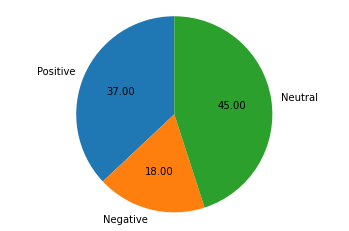

In [15]:
pieLabels=["Positive","Negative","Neutral"]

populationShare=[pos,neg,neu]

figureObject, axesObject = plt.subplots()

axesObject.pie(populationShare,labels=pieLabels,autopct='%1.2f',startangle=90)

axesObject.axis('equal')

plt.show()

In [16]:
# Display the number of twitter users who feel a certain way about the given topic.

print("%f percent of twitter users feel positive about %s"%(pos,query))

print("%f percent of twitter users feel negative about %s"%(neg,query))

print("%f percent of twitter users feel neutral about %s"%(neu,query))

37.000000 percent of twitter users feel positive about elon musk
18.000000 percent of twitter users feel negative about elon musk
45.000000 percent of twitter users feel neutral about elon musk


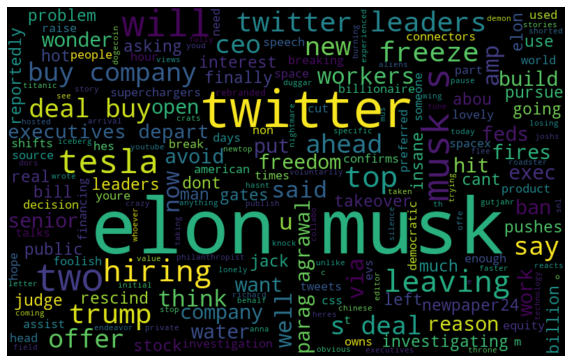

In [17]:
# Create a Wordcloud from the tweets

all_words = ' '.join([text for text in cleaned])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()